In [1]:
import os
import matplotlib.pyplot as plt
from pySMOKEPostProcessor import PostProcessor
from pySMOKEPostProcessor import OpenSMOKEppXMLFile

**Formation Rates**: function that returns the formation rate in [kmol/m3/s] or [kg/m3/s] of a specific species.
   > * `specie` ( *string* ): specie for which is desired the formation rate.
   > * `units` ( *string* ): specify the unit of measurement for which is required the formation rate. Types are **mass** ([kg/m3/s]) and **moles** ([kmol/m3/s]). Default: **moles**
   > * `formation_rate_type` ( *string* ): Which kind of formation rate is required. choose among:
      >> * **net**
      >> * **production** (only the production rate is computed and is strictly positive), 
      >> * **destruction** (only the destruction rate is computed and is strictly positive), 
      >> * **characteristic-time** ratio between the concentration and the destruction rate (for the selected species)

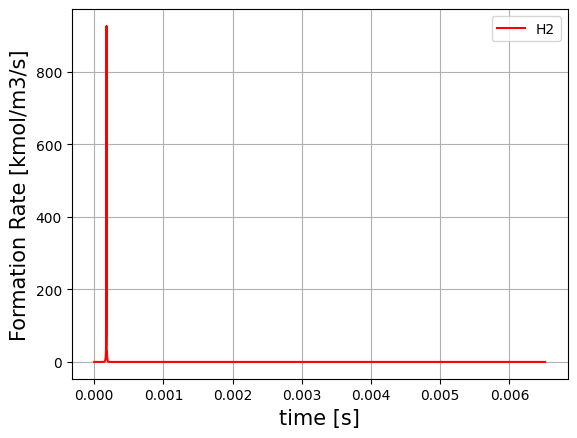

In [2]:
kineticFolder = os.path.join("..", "data", "ROPA", "kinetics")
resultsFolder = os.path.join("..", "data", "ROPA", "Output")

pp = PostProcessor(kineticFolder, resultsFolder)
output = OpenSMOKEppXMLFile(resultsFolder, kineticFolder)

formation_rates = pp.GetFormationRates(species = 'H2',
                                       units = 'mole',
                                       formation_rate_type = 'destruction')

plt.plot(output.time, formation_rates, 'r', label = 'H2')
plt.xlabel('time [s]', fontsize=15)
plt.ylabel('Formation Rate [kmol/m3/s]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

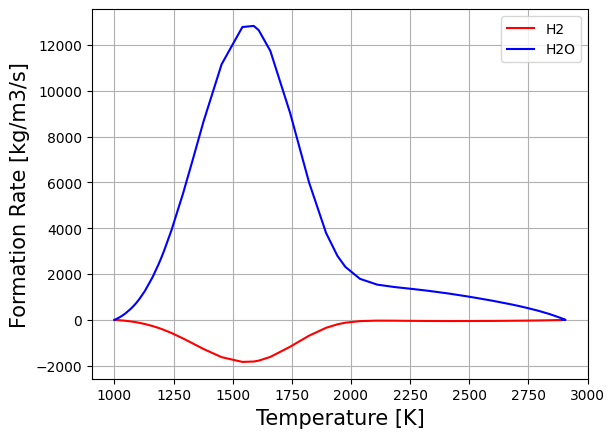

In [3]:
formation_rate_H2 = pp.GetFormationRates(species = 'H2', units = 'mass', formation_rate_type = 'net')

formation_rate_H2O = pp.GetFormationRates(species = 'H2O', units = 'mass', formation_rate_type = 'net')

plt.plot(output.T, formation_rate_H2, 'r', label = 'H2')
plt.plot(output.T, formation_rate_H2O, 'b', label = 'H2O')
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel('Formation Rate [kg/m3/s]', fontsize=15)
plt.legend()
plt.grid()
plt.show()

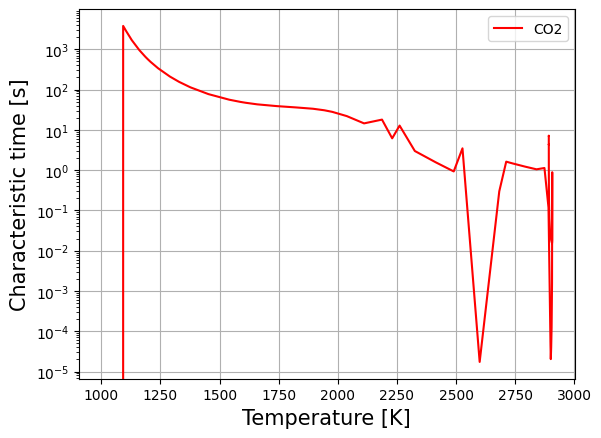

In [4]:
char_time_CO2 = pp.GetFormationRates(species = 'CO2', units = 'mole', formation_rate_type = 'characteristic-time')

plt.plot(output.T, char_time_CO2, 'r', label = 'CO2')
plt.xlabel('Temperature [K]', fontsize=15)
plt.ylabel('Characteristic time [s]', fontsize=15)
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()